In [31]:
# Import libraries for Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import libraries for R
%load_ext rpy2.ipython
%R require(ggplot2)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


1


In [ ]:
# Load the dataset into the notebook. You can use Pandas to read data from a CSV file or a database

In [8]:
# Load data into a Pandas dataframe
df = pd.read_csv('covid19_variant.csv')

In [ ]:
# Explore the dataset to get an idea of its structure and content. You can use Pandas functions such as head, tail, describe, and info to inspect the data.
# python


In [9]:
# View the first 5 rows of the data
df.head()

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
0,01-01-2021,California,State,Alpha,1,1.69,NaN,NaN
1,01-01-2021,California,State,Lambda,0,0.00,NaN,NaN
2,01-01-2021,California,State,Other,29,49.15,NaN,NaN
3,01-01-2021,California,State,Epsilon,28,47.46,NaN,NaN
4,01-01-2021,California,State,Omicron,1,1.69,NaN,NaN


In [10]:
# View the last 5 rows of the data
df.tail()

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
7785,18-02-2023,California,State,Lambda,0,0.0,0.000000,0.000000
7786,18-02-2023,California,State,Beta,0,0.0,0.000000,0.000000
7787,18-02-2023,California,State,Omicron,36,97.3,88.857143,98.730159
7788,18-02-2023,California,State,Epsilon,0,0.0,0.000000,0.000000
7789,18-02-2023,California,State,Other,1,2.7,1.142857,1.269841


In [11]:
# View summary statistics for the data
df.describe()

,specimens,percentage,specimens_7d_avg,percentage_7d_avg
count,7790.000000,7790.000000,7730.000000,7730.000000
mean,177.596919,20.000004,178.622731,20.000000
std,485.649656,37.925758,449.876303,37.927537
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.142857,0.013672
75%,28.000000,7.380000,27.857143,7.414083
max,5802.000000,100.000000,3295.000000,100.000000


In [12]:
# View information about the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7790 entries, 0 to 7789
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               7790 non-null   object 
 1   area               7790 non-null   object 
 2   area_type          7790 non-null   object 
 3   variant_name       7790 non-null   object 
 4   specimens          7790 non-null   int64  
 5   percentage         7790 non-null   float64
 6   specimens_7d_avg   7730 non-null   float64
 7   percentage_7d_avg  7730 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 487.0+ KB


In [ ]:
# Clean the data by removing or replacing missing values, removing duplicates, and transforming the data if necessary.

In [15]:
# Remove rows with missing values
df.dropna(inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Transform the data by adding or removing columns, changing data types, etc.
df['Area_variant'] = df['area'] + df['variant_name']
df['percentage_as'] = df['percentage'].astype('int')

In [ ]:
# Perform data analysis to identify trends and patterns in the data. You can use various statistical methods and visualization tools to analyze the data, such as histograms, scatter plots, regression analysis, and clustering

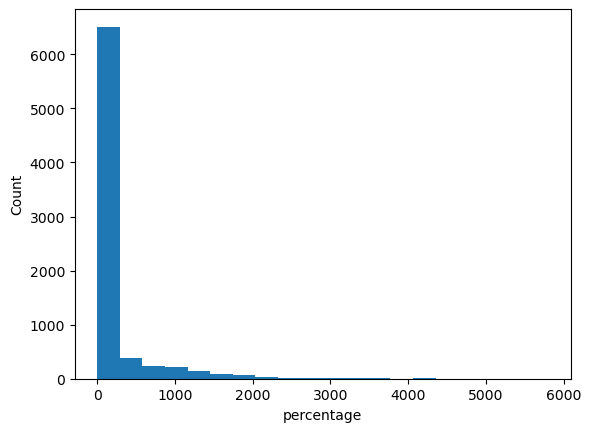

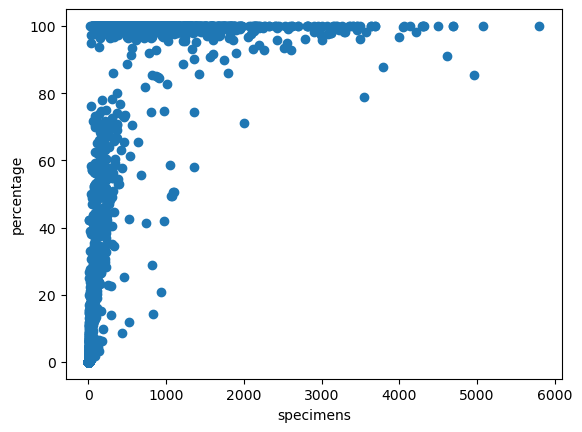

Slope: 0.05657831171498087
Intercept: 9.91596411396111
R value: 0.7258924145360668


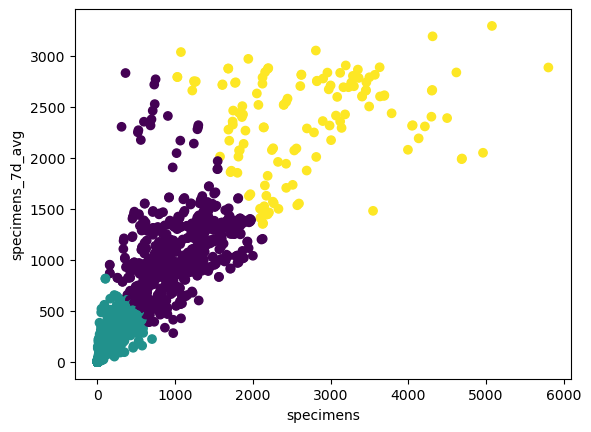

In [34]:
# Plot a histogram of the data
plt.hist(df['specimens'], bins=20)
plt.xlabel('percentage')
plt.ylabel('Count')
plt.show()

# Plot a scatter plot of two columns
plt.scatter(df['specimens'], df['percentage'])
plt.xlabel('specimens')
plt.ylabel('percentage')
plt.show()

# Perform a linear regression analysis
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['specimens'], df['percentage'])
print('Slope:', slope)
print('Intercept:', intercept)
print('R value:', r_value)

# Perform clustering analysis using K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['specimens', 'specimens_7d_avg']])
df['cluster'] = kmeans.labels_

# Plot a scatter plot of two columns colored by cluster
plt.scatter(df['specimens'], df['specimens_7d_avg'], c=df['cluster'])
plt.xlabel('specimens')
plt.ylabel('specimens_7d_avg')
plt.show()